# Entregável 1 - visão computacional

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.2.0 


# Equalização de histograma

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

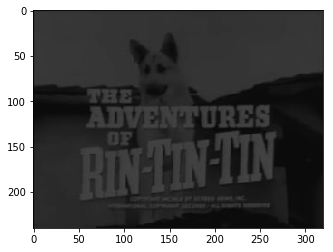

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

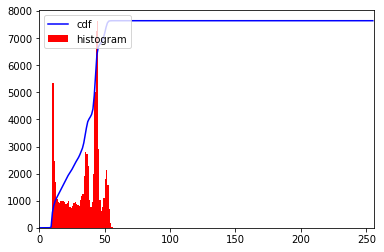

In [8]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

Não, pois antes do 8 e dps do 58 não há valores

In [9]:
print(min(rintin_gray.flatten()))
print(max(rintin_gray.flatten()))
maximo = max(rintin_gray.flatten())

8
58


In [84]:
output = np.zeros(rintin_gray.shape, dtype=np.uint8)

for i in range(output.shape[0]):
    for e in range(output.shape[1]):
        output[i][e] = (rintin_gray[i][e]-8) * 258 / 48

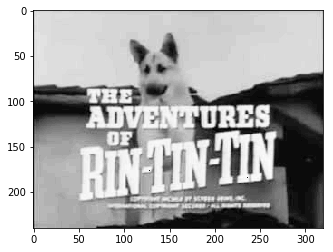

In [85]:
plt.imshow(output, cmap="Greys_r", vmin=0, vmax=255)

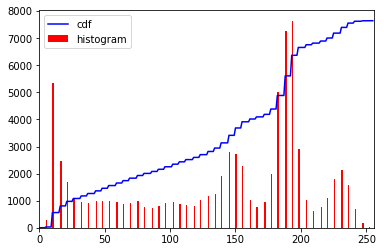

In [86]:

hist,bins = np.histogram(output.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(output.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


In [13]:
canto = cv2.imread("cena_canto_sala.jpg")

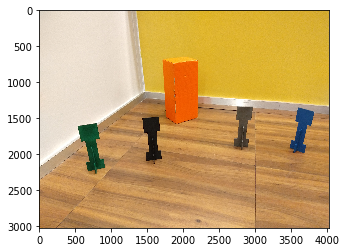

In [14]:
canto_rgb = cv2.cvtColor(canto, cv2.COLOR_BGR2RGB)
plt.imshow(canto_rgb)

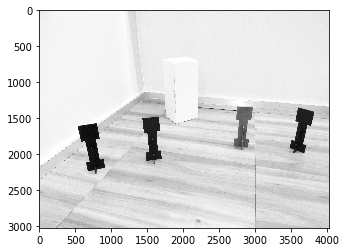

In [15]:
canto_r = canto_rgb[:,:,0]
plt.imshow(canto_r, cmap='Greys_r')

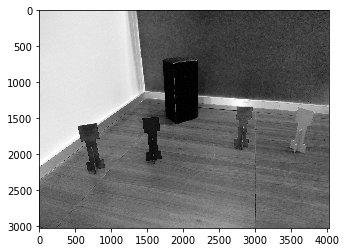

In [16]:
canto_b = canto_rgb[:,:,2]
plt.imshow(canto_b, cmap='Greys_r')

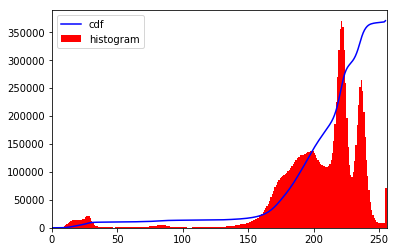

In [17]:
hist,bins = np.histogram(canto_r.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(canto_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

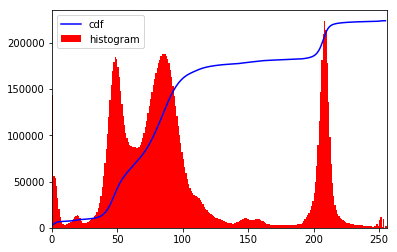

In [18]:
hist,bins = np.histogram(canto_b.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(canto_b.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [19]:
canto_novo = np.zeros(canto.shape, dtype=np.uint8)
for i in range(canto_b.shape[0]):
    for e in range(canto_b.shape[1]):
        if canto_b[i][e] < 20 and canto_r[i][e] > 210:
            canto_novo[i][e] = 255
        else:
            canto_novo[i][e] = 0

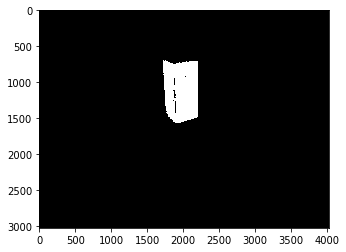

In [20]:
plt.imshow(canto_novo, cmap='Greys_r')

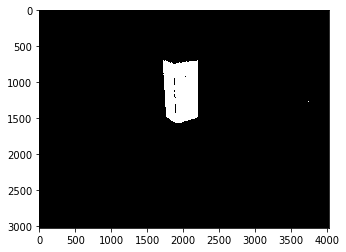

In [21]:
canto_novo_tampa = np.zeros(canto.shape, dtype=np.uint8)

R>252
G<215

for i in range(canto_b.shape[0]):
    for e in range(canto_b.shape[1]):
        if canto_b[i][e] < 20 and canto_r[i][e] > 160:
            canto_novo_tampa[i][e] = 255
        else:
            canto_novo_tampa[i][e] = 0
plt.imshow(canto_novo_tampa, cmap='Greys_r')

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

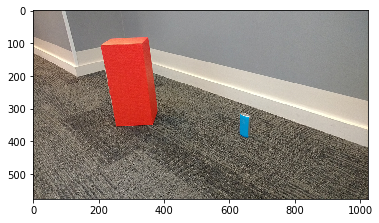

In [22]:
hall = cv2.imread("hall_box_battery_atividade3.png")
hall_rgb = cv2.cvtColor(hall, cv2.COLOR_BGR2RGB)
plt.imshow(hall_rgb)

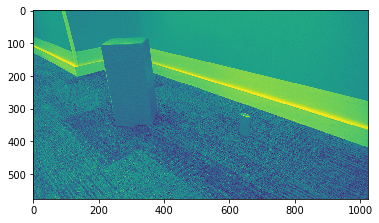

In [23]:
hall_gray = cv2.cvtColor(hall_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(hall_gray)

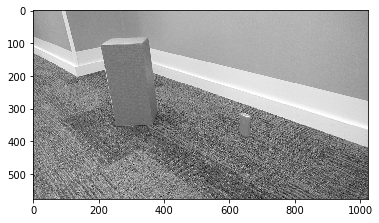

In [24]:
plt.imshow(hall_gray, cmap="Greys_r", vmin=0, vmax=255)

In [87]:
hall_f = np.zeros(hall_gray.shape, dtype=np.uint8)
print(hall_gray.shape)
for i in range(hall_gray.shape[0]):
    for e in range(hall_gray.shape[1]):
        if i==0 or i==hall_gray.shape[0]-1:
            hall_f[i][e] = hall_gray[i][e]
        else:
            hall_f[i][e] = abs(int(hall_gray[i+1][e]) - int(hall_gray[i-1][e]))

(576, 1024)


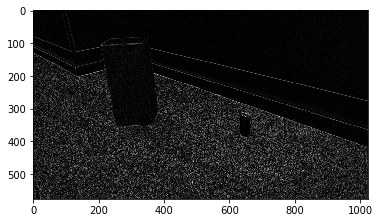

In [88]:
plt.imshow(hall_f, cmap="Greys_r",vmin = 0, vmax = 255)

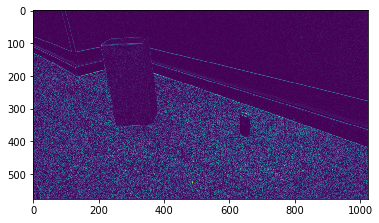

In [89]:
plt.imshow(hall_f)